In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
car_data = pd.read_csv("car_data.csv")
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
#catagorical data
car_data["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [5]:
car_data["Seller_Type"].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [6]:
car_data["Transmission"].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [7]:
# plotting 
fuel_type = car_data["Fuel_Type"]
seller_type = car_data["Seller_Type"]
transmission_type = car_data["Transmission"]
selling_price = car_data["Selling_Price"]

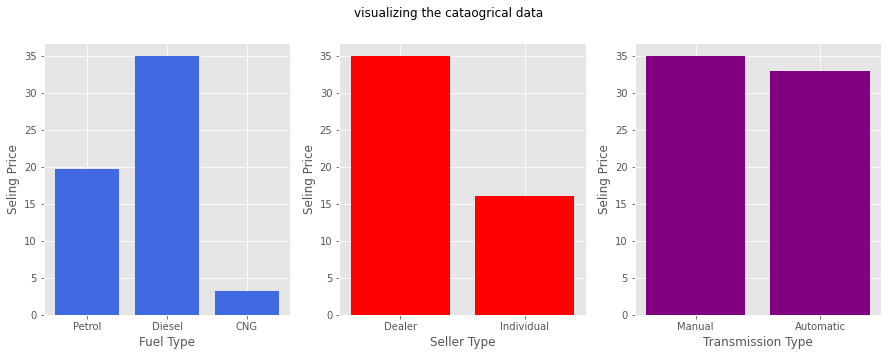

In [8]:
from matplotlib import style
style.use("ggplot")
fig = plt.figure(figsize=(15,5))
fig.suptitle("visualizing the cataogrical data")
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price,color="royalblue")
plt.xlabel("Fuel Type")
plt.ylabel("Seling Price")
plt.subplot(1,3,2)
plt.bar(seller_type,selling_price,color="red")
plt.xlabel("Seller Type")
plt.ylabel("Seling Price")
plt.subplot(1,3,3)
plt.bar(transmission_type,selling_price,color="purple")
plt.xlabel("Transmission Type")
plt.ylabel("Seling Price")
plt.show()

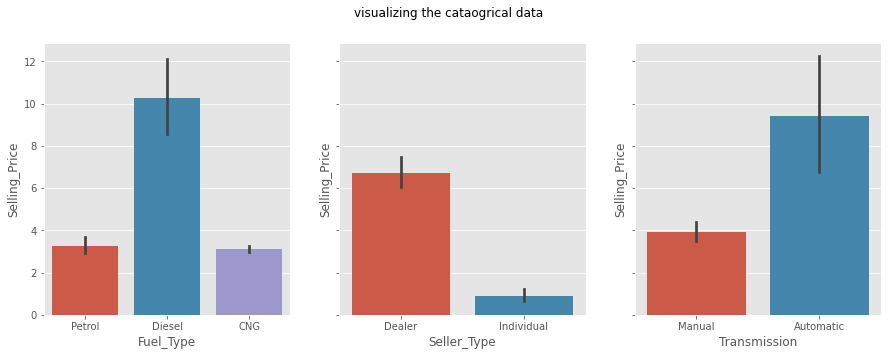

In [9]:
fig, axes = plt.subplots(1,3,figsize=(15,5),sharey=True)
fig.suptitle("visualizing the cataogrical data")
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])
plt.show()

In [10]:
petrol_data = car_data.groupby("Fuel_Type").get_group("Petrol").describe()
petrol_data

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.290685,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


In [11]:
seller_data = car_data.groupby("Seller_Type").get_group("Dealer").describe()
seller_data

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2013.712821,6.721692,10.886308,39850.133333,0.020513
std,2.686275,5.136088,8.806563,24860.401003,0.142111
min,2003.000000,1.050000,2.690000,2071.000000,0.000000
25%,2012.000000,3.750000,6.580000,22148.500000,0.000000
50%,2014.000000,5.250000,8.500000,39485.000000,0.000000
75%,2016.000000,7.625000,13.460000,51785.500000,0.000000
max,2018.000000,35.000000,92.600000,197176.000000,1.000000


In [12]:
# converting catagorical data to numeric data
# manual encoding
car_data.replace({"Fuel_Type":{"Petrol":0,"Diesel":1, "CNG":2}}, inplace=True)
#one hot encoding
car_data = pd.get_dummies(car_data, columns=["Seller_Type", "Transmission"], drop_first=True)
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1


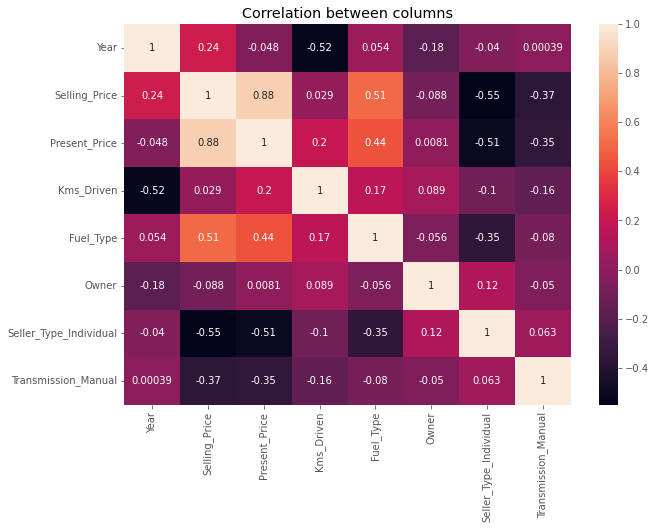

In [13]:
#plotting heatmap
plt.figure(figsize=(10,7))
sns.heatmap(car_data.corr(), annot=True)
plt.title("Correlation between columns")
plt.show()

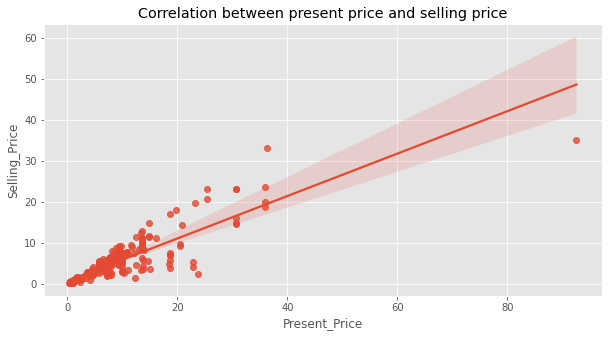

In [14]:
fig = plt.figure(figsize=(10, 5))
plt.title("Correlation between present price and selling price")
sns.regplot(x="Present_Price", y="Selling_Price", data=car_data)
plt.show()

In [15]:
X = car_data.drop(["Car_Name","Selling_Price"], axis=1)
y = car_data["Selling_Price"]
print("Shape of X is:",X.shape)
print("Shape of y is:",y.shape)

Shape of X is: (301, 7)
Shape of y is: (301,)


In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
print("shape of x_train:",x_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_train:",y_train.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (210, 7)
shape of x_test: (91, 7)
shape of y_train: (210,)
shape of y_test: (91,)


In [18]:
scalar = StandardScaler()

In [19]:
x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)

In [20]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [21]:
pred = model.predict(x_test)

In [22]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [23]:
print("MAE:",(metrics.mean_absolute_error(pred, y_test)))
print("MSE:",(metrics.mean_squared_error(pred, y_test)))
print("R2 Score:",(metrics.r2_score(pred, y_test)))

MAE: 1.231953300876687
MSE: 3.45795384583379
R2 Score: 0.8528582949898235


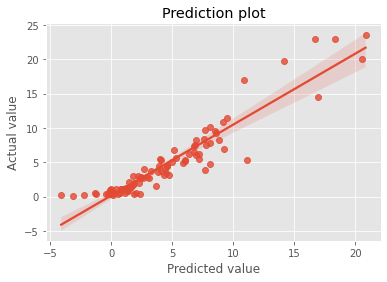

In [24]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Prediction plot")
plt.show()

In [25]:
model.coef_

array([ 1.05890918,  3.80722631, -0.16082884,  0.62197465, -0.29294644,
       -0.54035334, -0.45025512])

In [26]:
model.intercept_

4.5732380952381115